In [5]:
import numpy as np
param_max = 5 # Largest number of parameters

data = np.loadtxt('dataHw1.dat')
t = data[:,0].copy()
y = data[:,1].copy()
phi = np.stack([(t - 1)**n for n in range(0,param_max)], axis=1)
# print(y)
print(phi)

[[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04]
 [1.0000e+00 1.1000e+01 1.2100e+02 1.3310e+03 1.4641e+04]
 [1.0000e+00 1.2000e+01 1.4400e+02 1.7280e+03 2.0736e+04]
 [1.0000e+00 1.3000e+01 1.6900e+02 2.1970e+03 2.8561e+04]
 [1.0000e+00 1.4000e+01 1.9600e+02 2.7440e+03 3.8416e+04]]


In [2]:
import pprint
import pandas as pd
from numpy.linalg import inv

theta_hat = []
loss = []
for i in range(0,param_max):
    phi_temp = phi[:, 0:i+1]
    theta_temp = inv(phi_temp.T@phi_temp)@phi_temp.T@y
    err = (y - phi_temp@theta_temp)
    theta_hat.append(np.append(theta_temp, [0]*(param_max - i - 1)))
    loss.append(err@err/2)
    
df = pd.DataFrame(np.vstack(theta_hat),
                  index=[i for i in range(1,param_max+1)],
                  columns=[f'Theta{i}' for i in range(1,param_max+1)])
df['Loss'] = loss
df

,Theta1,Theta2,Theta3,Theta4,Theta5,Loss
1,51.435013,0.000000,0.000000,0.000000,0.000000,24103.092840
2,-31.106229,11.791606,0.000000,0.000000,0.000000,4637.216740
3,11.150564,-7.711529,1.393081,0.000000,0.000000,634.251379
4,8.137128,-4.576673,0.813574,0.027596,0.000000,612.440363
5,4.234310,3.497340,-1.992023,0.346007,-0.011372,563.290183


Text(0.5, 1.0, 'y_hat vs. t')

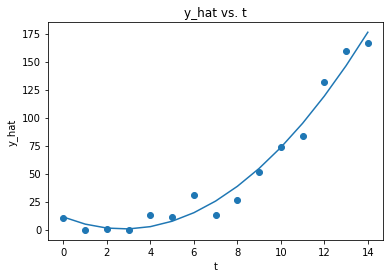

In [3]:
import matplotlib.pyplot as mpl
num_param_best = 3

theta_hat_true = df.loc[num_param_best, df.columns != 'Loss']
y_hat = phi@theta_hat_true

mpl.scatter((t - 1), y)
mpl.plot((t - 1), y_hat)
mpl.xlabel('t')
mpl.ylabel('y_hat')
mpl.title('y_hat vs. t')

In [ ]:
num_param_best = 3
sigma = np.sqrt(2*df['Loss']/(np.array([15]*param_max) - df.index))
sigma

# sigma = 11
# phi_true = phi[:, 0:num_param_best]
# cov = pd.DataFrame((sigma**2)*inv(phi_true.T@phi_true), 
#                    index=[i for i in range(1,num_param_best+1)], 
#                    columns=[i for i in range(1,num_param_best+1)])
# pp.pprint(cov)

In [1]:
import numpy as np
import scipy as spy
from numpy.linalg import inv
from scipy.signal import unit_impulse 
sample_depth = 200

a1 = 1.3
a2 = 0.75
b0 = 1.1
b1 = -0.35

theta0 = np.array([a1, a2, b0, b1])
p = 100*np.identity(4) # starting P matrix

sigma = 0.65
y0 = np.random.normal(0, sigma)
y = [[y0],[y0]] # first elements in y vector
# y = [[np.random.normal(0, sigma)],[np.random.normal(0, sigma)]]

u_t1 = unit_impulse(sample_depth, 100) # Creating impulse delta(t - 100)
u_t2 = np.zeros(sample_depth) # Creating unit step unit(t - 100)
u_t2[np.where(np.arange(0,sample_depth) >= 100)] = 1
u_t = np.stack([u_t1, u_t2]) # impulse = u_t[0], step = u_t[1]

theta_hat0 = np.array([0]*4)
theta_hat = [[theta_hat0], [theta_hat0]]

In [57]:
# theta_hat[0].append(np.array([1]*4))
# print(theta_hat[0])
phi = np.array([-y[0][0], 0, u_t[0][0], 0])
print(phi)
print(theta_hat[0][0])
phi@theta_hat[0][0]
# y[0].append(1)
# print(y)

[0.08623647 0.         0.         0.        ]
[0 0 0 0]


0.0

In [2]:
for j in [0, 1]:
    for i in range(1,sample_depth):
        if (i == 1): # accounts for the lack of t-2 data on first iteration
            phi = np.array([-y[j][i-1], 0, u_t[j][i-1], 0])
        phi = np.array([-y[j][i-1], -y[j][i-2], u_t[j][i-1], u_t[j][i-2]])
        y[j].append(phi.T@theta0 + np.random.normal(0, sigma))
        p = inv(inv(p) + phi@phi.T)
        k = p@phi
        theta_hat[j].append(theta_hat[j][i-1] + k*(y[j][i] - phi.T@theta_hat[j][i-1]))

        

C:\Users\clive\AppData\Local\Temp\ipykernel_26556\421046482.py:9: RuntimeWarning: overflow encountered in multiply
  theta_hat[j].append(theta_hat[j][i-1] + k*(y[j][i] - phi.T@theta_hat[j][i-1]))
C:\Users\clive\AppData\Local\Temp\ipykernel_26556\421046482.py:9: RuntimeWarning: invalid value encountered in add
  theta_hat[j].append(theta_hat[j][i-1] + k*(y[j][i] - phi.T@theta_hat[j][i-1]))
C:\Users\clive\AppData\Local\Temp\ipykernel_26556\421046482.py:9: RuntimeWarning: invalid value encountered in matmul
  theta_hat[j].append(theta_hat[j][i-1] + k*(y[j][i] - phi.T@theta_hat[j][i-1]))


In [30]:
y[0] is y[1]
print(y[0][-1], y[1][-1])

-1.6328107022469498 -0.45439742617192713
